In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [60]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [61]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

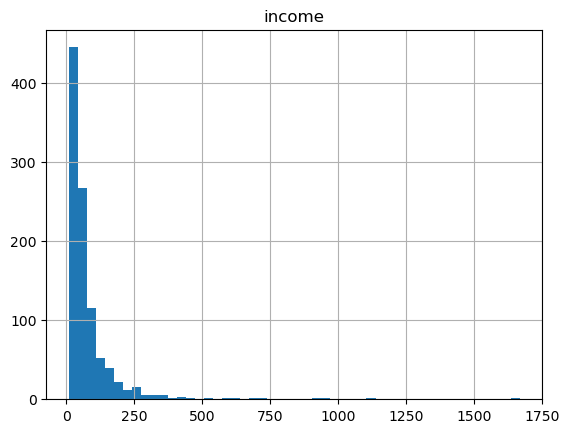

In [62]:
df.hist(column='income', bins=50)
plt.show()

In [63]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [64]:
# we need to convert pandas dataframe into numpy array in order to use scikit-learn library
x = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values
x[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [65]:
# dependent variable is 1d array while independent variables is 2d
y = df['custcat'].values
y[0:5] # displays top 5 array

array([1, 4, 3, 1, 3])

In [66]:
# preprocessing.StandardScalar is a tool for scaling data i.e. avg mean becomes 0 and sd becomes 1
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [67]:
from sklearn.model_selection import train_test_split
# train_test_split outputs train and test sets. random_state is assigned with any integer to go back to the same state.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)
print('Train set: ', x_train.shape, y_train.shape)
print('Test set: ', x_test.shape, y_test.shape)

Train set:  (800, 11) (800,)
Test set:  (200, 11) (200,)


In [68]:
from sklearn.neighbors import KNeighborsClassifier

# number of nearest neighbours used for prediction k = 4
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [73]:
yhat = neigh.predict(x_test)
yhat[0:5]

array([1, 1, 3, 2, 4])

In [74]:
from sklearn import metrics
# to calculate accuracy of classification model using metrics.accuracy_score()
print('Train set accuracy: ', metrics.accuracy_score(y_train, neigh.predict(x_train)))
print('Test set accuracy: ', metrics.accuracy_score(y_test, yhat))

Train set accuracy:  0.5475
Test set accuracy:  0.32


In [76]:
# training the model again using k = 6
from sklearn.neighbors import KNeighborsClassifier

k = 6
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
neigh

KNeighborsClassifier(n_neighbors=6)

In [77]:
yhat = neigh.predict(x_test)
yhat[0:5]

array([3, 3, 3, 4, 4])

In [78]:
from sklearn.metrics import accuracy_score
print('Train set accuracy: ', accuracy_score(y_train, neigh.predict(x_train)))
print('Test set accuracy: ', accuracy_score(y_test, yhat))

Train set accuracy:  0.51625
Test set accuracy:  0.31


In [82]:
Ks = 10

mean_acc = np.zeros((Ks - 1))
std_acc = np.zeros((Ks - 1))

for n in range(1, Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train, y_train)
    yhat = neigh.predict(x_test)
    mean_acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat == y_test)/np.sqrt(yhat.shape[0])
    
print(mean_acc)    
print(std_acc)

[0.3   0.29  0.315 0.32  0.315 0.31  0.335 0.325 0.34 ]
[0.0324037  0.03208582 0.03284623 0.03298485 0.03284623 0.03270321
 0.03337477 0.0331191  0.03349627]


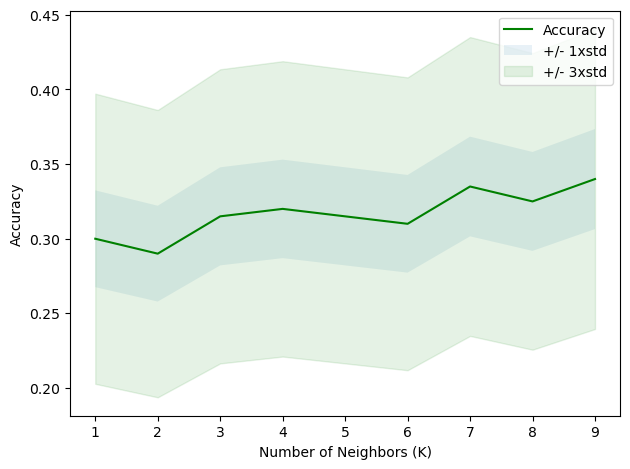

In [93]:
plt.plot(range(1, Ks), mean_acc, 'g') # 'g' is for green line
#lower bound = mean_acc - 1 * std_acc, upper bound = mean_acc + 1 * std_acc
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha = 0.10)
plt.fill_between(range(1, Ks), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha = 0.10, color = 'green')
plt.legend(('Accuracy', '+/- 1xstd','+/- 3xstd')) # displays legend in the order they were added to the plot.
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()


In [95]:
print('The best accuracy with', mean_acc.max(), 'with k =', mean_acc.argmax() + 1)

The best accuracy with 0.34 with k = 9
